In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
import os
from subprocess import check_output
from pandas.plotting import lag_plot
from datetime import datetime
plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [2]:
pip install statsmodels


In [3]:
df = pd.read_csv(r'C:\Users\jayas\OneDrive\Desktop\New folder\Time_series_Analysis\Tesla_stock_analysis\TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
df.shape

(2416, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

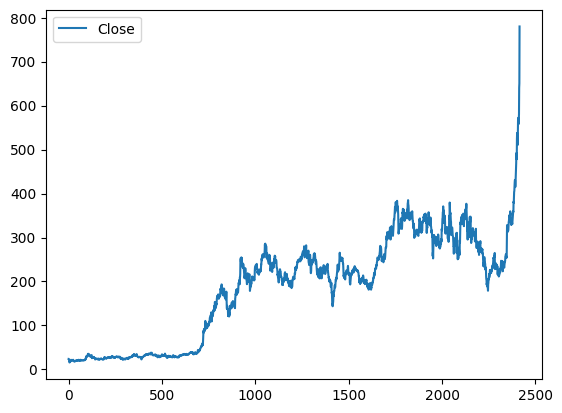

In [8]:
df[['Close']].plot()
plt.show()

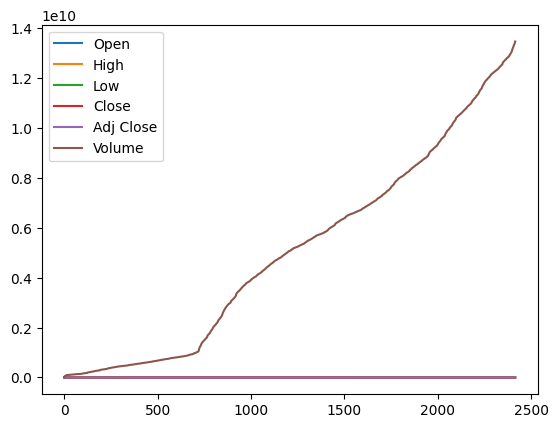

In [9]:
cum_sum = df.cumsum()
cum_sum.plot()
plt.show()

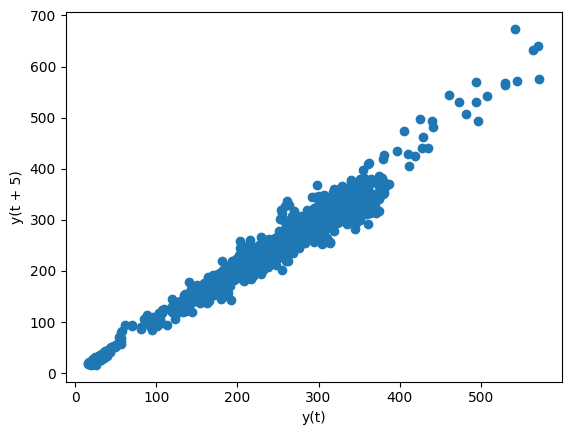

In [10]:
#lag_plot is specially used for the time series analysis to define the pattern or trends in it
lag_plot(df['Open'],lag=5)
plt.show()

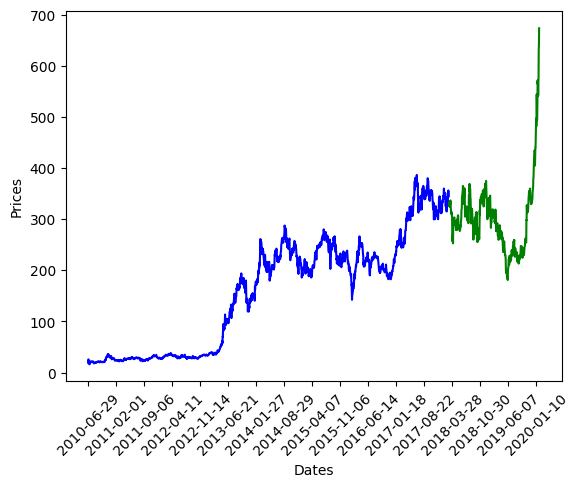

In [11]:
#in time series model we cannot use the train_test_split function due the order of the dates
train_data,test_data = df[0:int(len(df)*0.8)],df[int(len(df)*0.8):]
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Open'],'blue',label = 'Training data')
plt.plot(test_data['Open'],'green',label = 'Testing Data')
plt.xticks(np.arange(0, 2415, 150), df['Date'][0:2415:150],rotation = 45)
plt.show()

In [12]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

history = [x for x in train_ar] #list compression
print(type(history))

<class 'list'>


In [13]:
predictions = list()
for i in range(len(test_ar)):
    model = ARIMA(history,order = (5,1,0)) #lag value,stationary order,avarage order
    model_fit = model.fit()
    output = model_fit.forecast() #to predict next point
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[i]
    history.append(obs) 



In [14]:
def smape_kun(y_true,y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200 / (np.abs(y_pred)+np.abs(y_true))))

In [15]:
error1 = mean_squared_error(test_ar,predictions)
error2 = smape_kun(test_ar,predictions)

In [16]:
error1

125.25347002303722

In [17]:
error2

2.4977542308505454

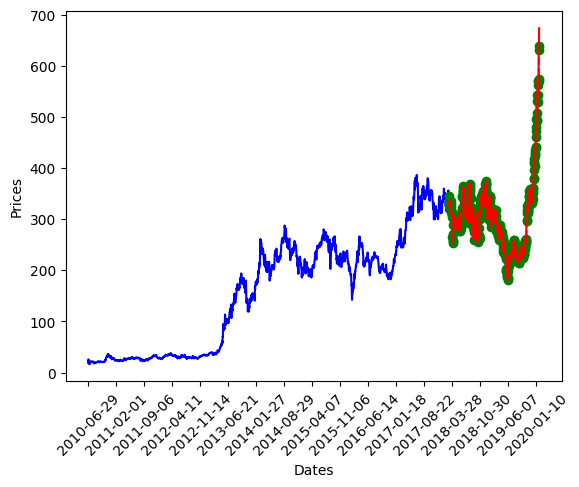

In [18]:
plt.plot(train_data['Open'],'blue',label = 'Training data')
plt.plot(test_data.index,predictions,'green',marker = 'o',linestyle = 'dashed',label = 'Predicted Price')
plt.plot(test_data['Open'],'red',label = 'Testing Data')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0, 2415, 150), df['Date'][0:2415:150],rotation = 45)
plt.show()


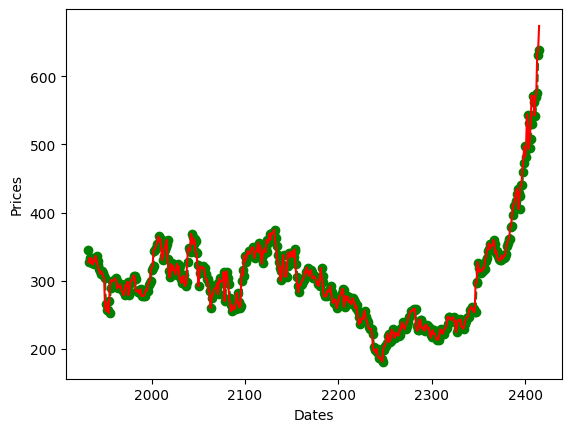

In [19]:
#The Predicted Data is almost correct we can see the predicted points are close to the actual points
plt.plot(test_data.index,predictions,'green',marker = 'o',linestyle = 'dashed',label = 'Predicted Price')
plt.plot(test_data['Open'],'red',label = 'Testing Data')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.show()

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Convert 'Date' to datetime and sort the data
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Select the 'Close' column for LSTM and normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 60  # Use the last 60 days to predict the next day
X, y = create_sequences(scaled_close, seq_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# Compile and fit the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Make predictions and reverse the scaling
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions) #inverse_transform = it will renormalize the data that means the normalized data will be come to its original values
y_test = scaler.inverse_transform(y_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print(f"LSTM Model - MSE: {mse}, MAE: {mae}")


Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0204 - val_loss: 6.0160e-04
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 4.8916e-04 - val_loss: 5.5357e-04
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 4.3380e-04 - val_loss: 4.0044e-04
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 5.0803e-04 - val_loss: 3.7781e-04
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 4.0423e-04 - val_loss: 3.5026e-04
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 4.0857e-04 - val_loss: 3.7460e-04
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 3.5186e-04 - val_loss: 3.3852e-04
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 3.5196e-04 - val_loss: 2.9123e-04
Epoch 9/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 2.8926e-04 - val_loss: 4.0854e-04
Epoch 10/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 3.7189e-04 - val_loss: 2.6778e-04
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
LSTM Model - MSE: 156.38613476088

In [22]:
# Prepare data for regression
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
features = ['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day']
X_reg = df[features]
y_reg = df['Close']

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Fit the regression model
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

# Make predictions
reg_predictions = reg_model.predict(X_test_reg)

# Evaluate the model
reg_mse = mean_squared_error(y_test_reg, reg_predictions)
reg_mae = mean_absolute_error(y_test_reg, reg_predictions)
print(f"Linear Regression - MSE: {reg_mse}, MAE: {reg_mae}")


Linear Regression - MSE: 4.381042311041139, MAE: 1.337422345719492


In [23]:
# Compare the two models
print("Comparison of Models:")
print(f"LSTM Model - MSE: {mse}, MAE: {mae}")
print(f"Linear Regression - MSE: {reg_mse}, MAE: {reg_mae}")


Comparison of Models:
LSTM Model - MSE: 156.38613476088736, MAE: 8.478676827836894
Linear Regression - MSE: 4.381042311041139, MAE: 1.337422345719492
